# State Level Non-Hidden Fringe
New update to methodology: pull out dollars spend on object class DD as non-hidden fringe. See where these dollars are spent

In [50]:
%load_ext autoreload
%autoreload 2

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/pensions/State_Pensions_2Ver.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/anaconda3/lib/python3.7/importlib/__init__.py:169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  _bootstrap._exec(spec, module)


In [51]:
from sodapy import Socrata
app_token = "2Qa1WiG8G4kj1vGVd2noK7zP0"
client = Socrata("cthru.data.socrata.com", app_token)
client.timeout = 40

In [52]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 18), "lines.linewidth": 5})
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [53]:
import sys
import os
sys.path.insert(0, "/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory")
from Initialize_Agencies_3Ver import get_agencies


In [54]:
from Agency_Classes_2Ver import StateAgency

In [55]:
yr= list(range(2016,2020))
agencies = get_agencies(yr)

/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:162: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()
/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/Agency_Classes_2Ver.py:162: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  self.get_expenditures_by_year()


Create custom palette

In [56]:
benefit_payouts = pd.DataFrame(client.get("pegc-naaa", where = "object_class = '(DD) PENSION & INSURANCE RELATED EX' AND budget_fiscal_year >= 2016 AND budget_fiscal_year <=2019",  limit=9999999))

In [57]:
object_codes = set()
for name, agency in agencies.items():
    try:
        object_codes.update(agency.non_hidden_fringe["object_code"].unique())
    except:
        pass
object_codes =list(object_codes)

In [58]:
set1 = sns.color_palette("Set1", n_colors=len(object_codes))
pal = {object_codes[x]:set1[x] for x in range(len(object_codes)) }

In [59]:
pal["(D10) SURETY OF EMPLOYEES"]

(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)

In [60]:
pal["(D24) WORKERS' COMPENSATION  OR (IPP) PAYMENT"]

(0.8941176470588236, 0.10196078431372549, 0.10980392156862745)

In [61]:
object_codes

["(D24) WORKERS' COMPENSATION  OR (IPP) PAYMENT",
 '(D10) SURETY OF EMPLOYEES',
 '(D08) HEALTH & WELFARE TRUST FUND']

[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]
[(0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]
[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804), (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]
[(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]
[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]
[(0.30196078431372547, 0.6862745098039216, 0.2901960784313726), (0.21568627450980393, 0.49411764705882355, 0.7215686274509804)]


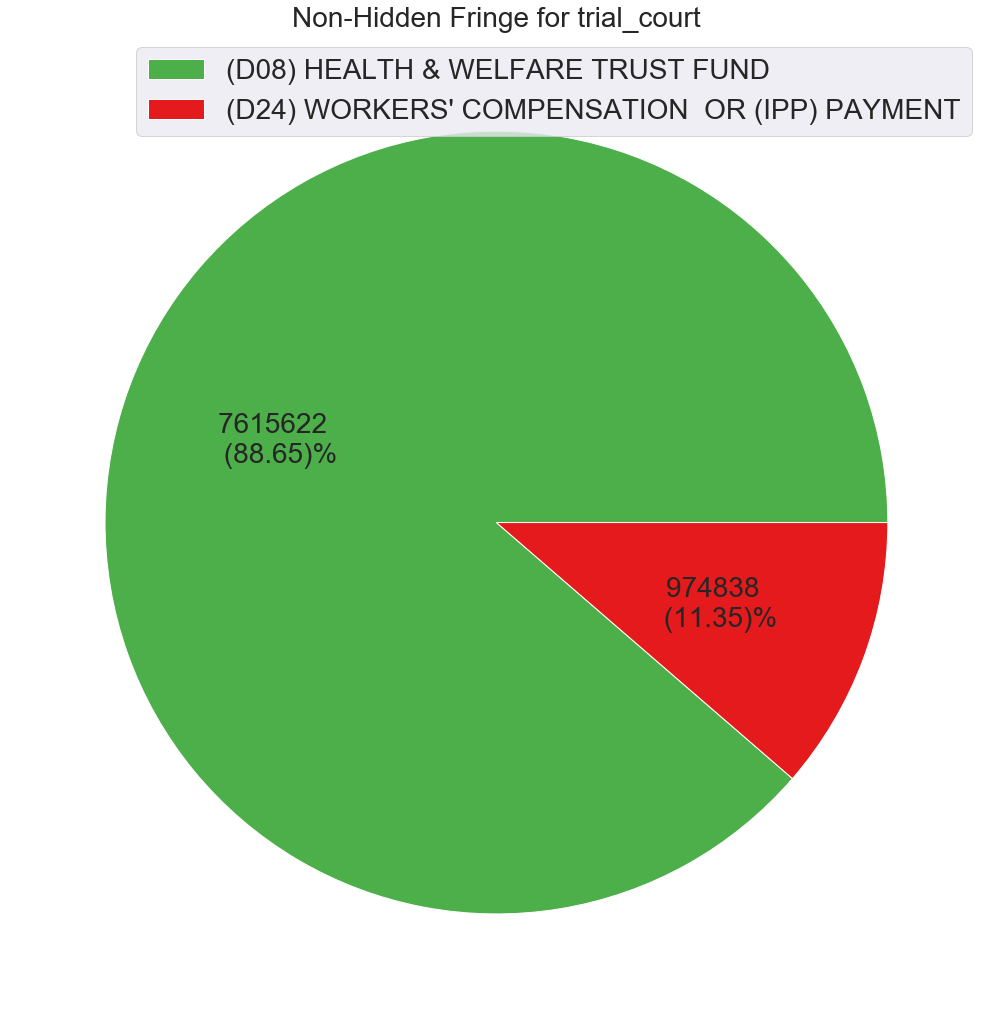

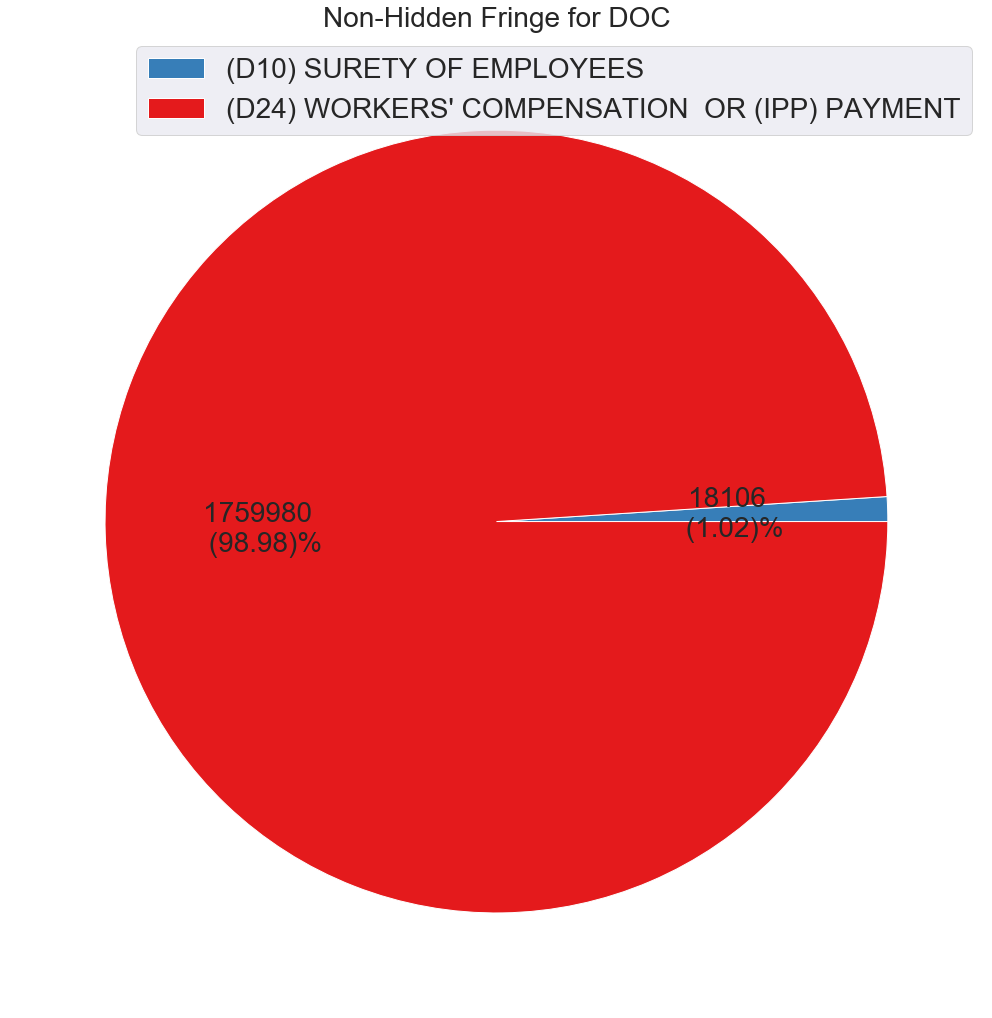

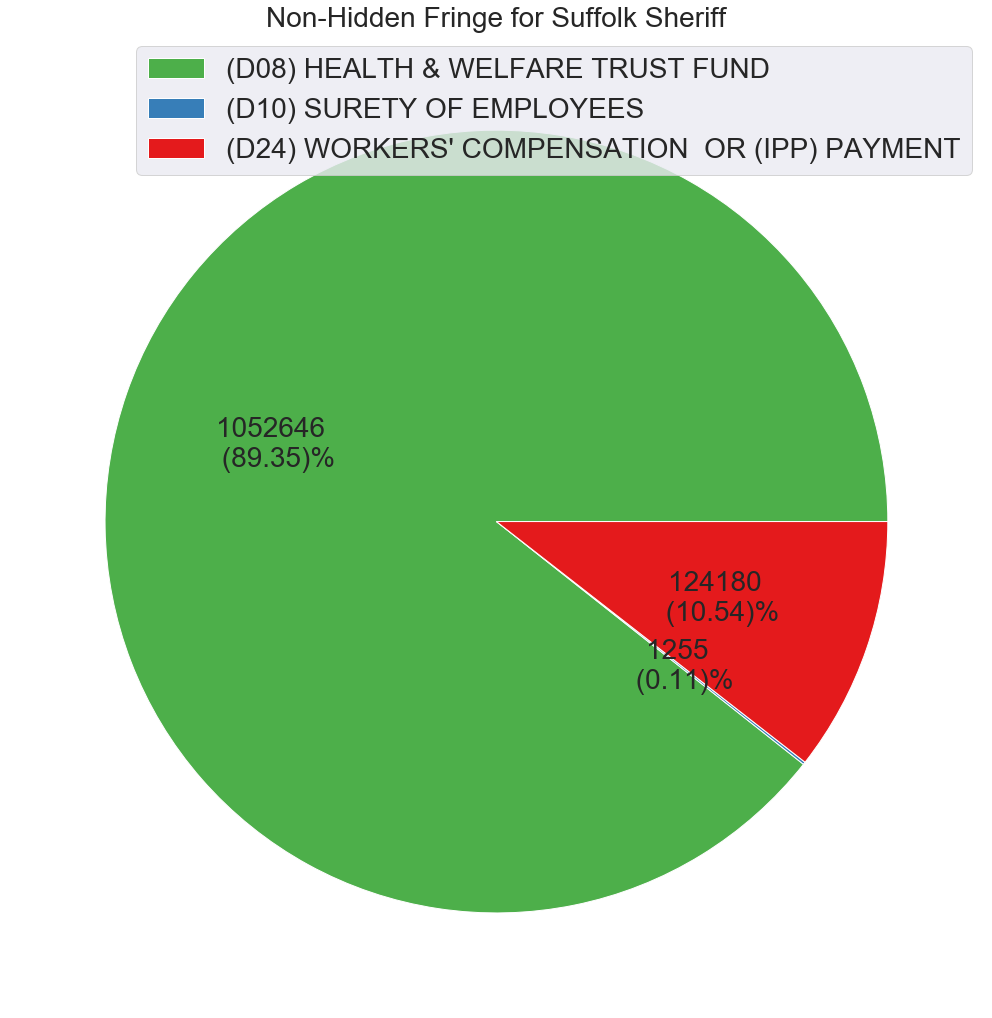

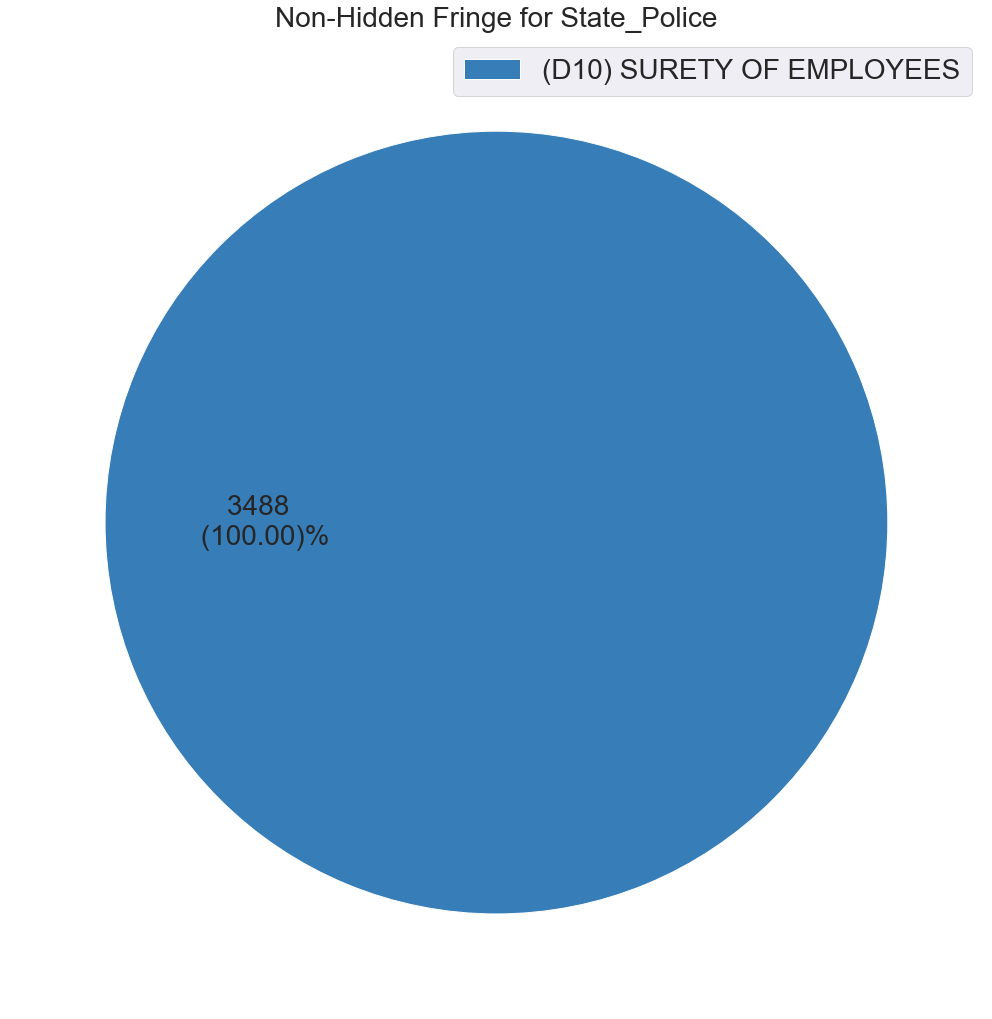

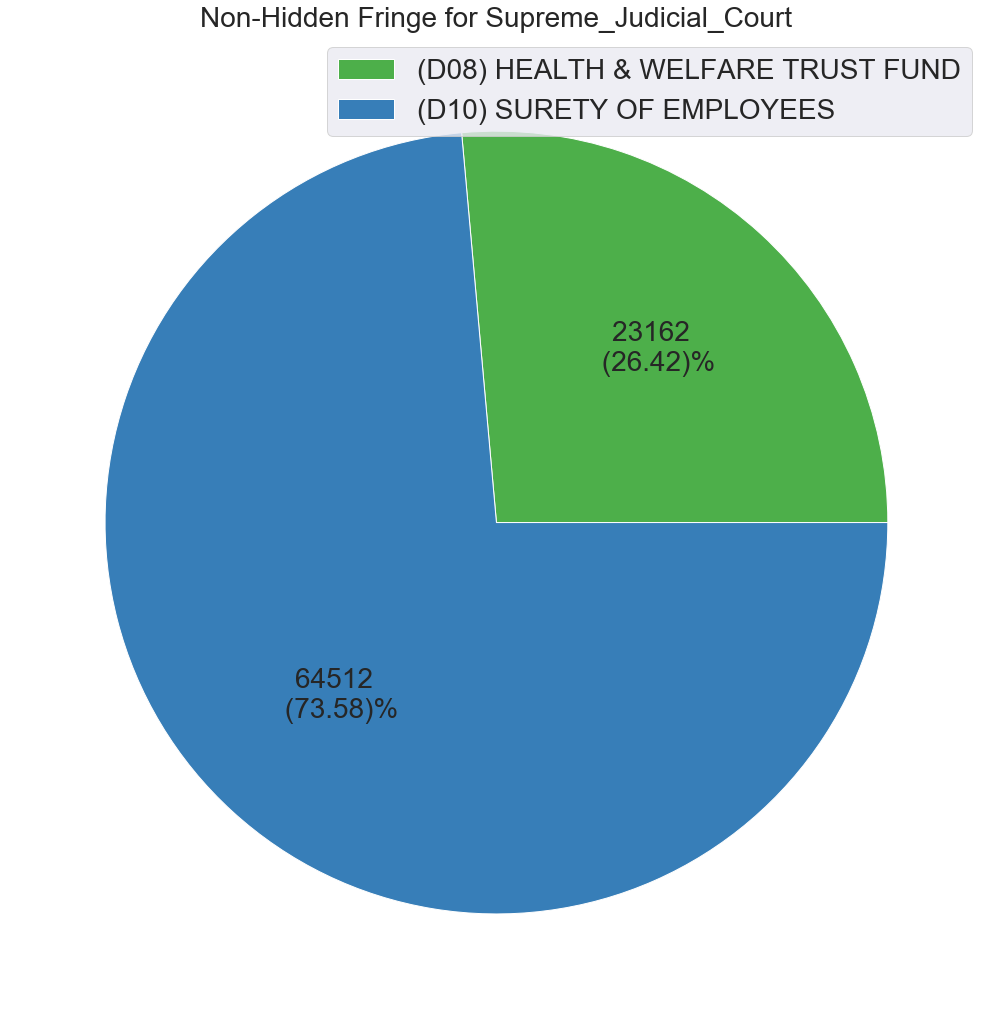

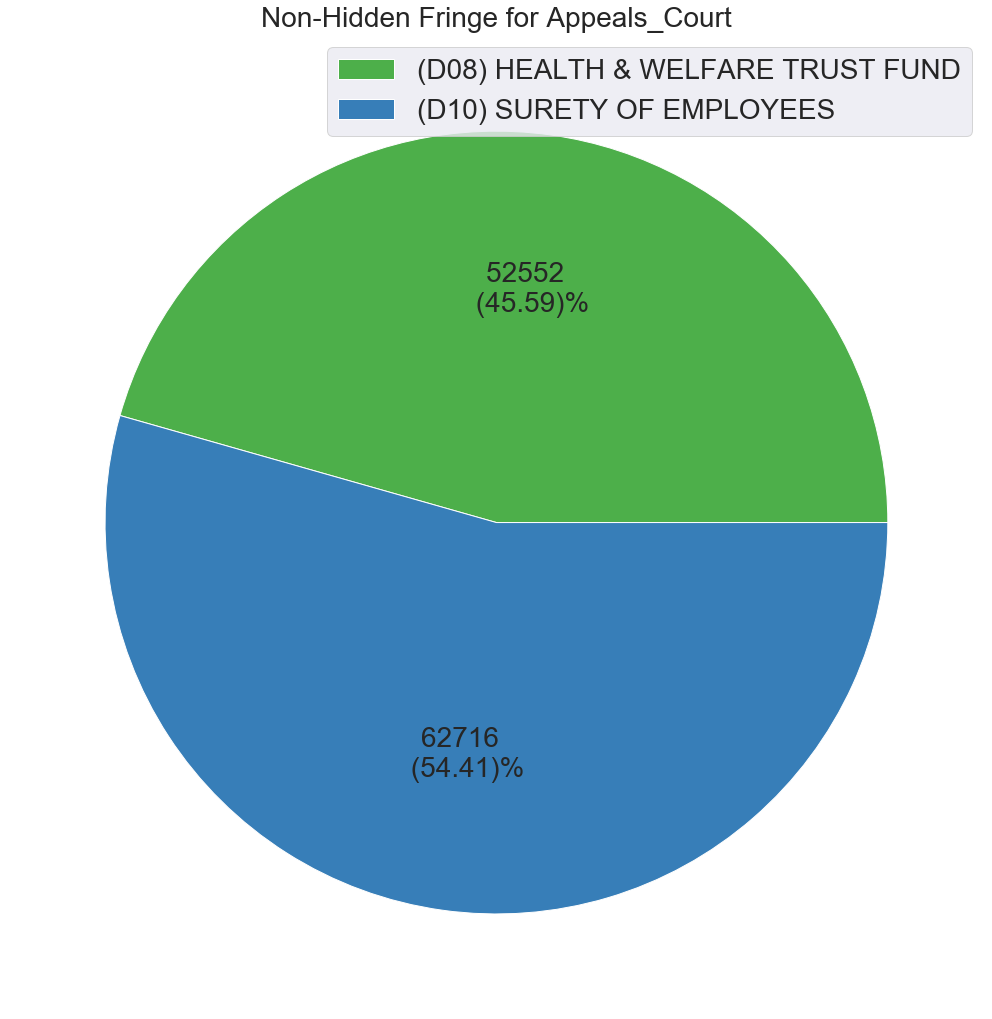

In [62]:
for name, agency in agencies.items():
    try:
        gb = agency.non_hidden_fringe.groupby("object_code").sum()["amount"]/4
        if not gb.empty:
            fig1, ax1 = plt.subplots()
            colors = [pal[x] for x in gb.index]
            print(colors)
            ax1.pie(gb.values, autopct =lambda p: '{:.0f} \n ({:1.2f})%'.format(p * gb.sum() / 100, p),  textprops={'fontsize': 28}, colors=colors )
            ax1.legend(gb.index, prop={'size': 28}, loc= "upper right")
            plt.title("Non-Hidden Fringe for {}".format(name), fontsize = 28)
            fig1.savefig("Nov9_Figures/{}_non_hidden_benefits_pie.png".format(name))
        
    except:
        pass

Another question: is there worker's comp money that goes through a state-wide department that could pay for worker's comp for our agencies?

In [63]:
benefit_payouts["amount"] = benefit_payouts["amount"].astype(float)

In [64]:
benefit_payouts[benefit_payouts["object_code"].str.contains("D24")].groupby("department").sum()["amount"].sort_values(ascending=False)

department
DEPARTMENT OF MENTAL HEALTH (DMH)            6608377.470
DEPARTMENT OF CORRECTION (DOC)               5668075.300
TRIAL COURT (TRC)                            2951101.910
DEPARTMENT OF YOUTH SERVICES (DYS)           2508377.820
DEPARTMENT OF DEVELOPMENTAL SERVICES (DMR)   1116708.060
SHERIFF DEPARTMENT ESSEX (SDE)                939790.920
SHERIFF DEPARTMENT NORFOLK (SDN)              871021.590
SHERIFF DEPARTMENT MIDDLESEX (SDM)            849138.250
SHERIFF DEPARTMENT WORCESTER (SDW)            819759.750
SHERIFF DEPARTMENT PLYMOUTH (SDP)             559008.590
SHERIFF DEPARTMENT HAMPDEN (SDH)              468754.750
SHERIFF DEPARTMENT SUFFOLK (SDS)              428863.490
SHERIFF DEPARTMENT BARNSTABLE (SDC)           380475.930
DEPARTMENT OF PUBLIC HEALTH (DPH)             304244.680
OFFICE OF THE COMPTROLLER (CTR)               293452.620
SHERIFF DEPARTMENT BRISTOL (BSD)               98215.990
UNIVERSITY OF MASSACHUSETTS SYSTEM (UMS)       85416.330
SOLDIERS' HOME IN MA

In [65]:
benefit_payouts[benefit_payouts["object_code"].str.contains("D10")].groupby("department").sum()["amount"].sort_values(ascending=False)

department
UNIVERSITY OF MASSACHUSETTS SYSTEM (UMS)                   32106943.520
SALEM STATE UNIVERSITY (SSA)                                 831387.360
OFFICE OF THE STATE TREASURER (TRE)                          245908.000
NORTH SHORE COMMUNITY COLLEGE (NSC)                          236166.310
TEACHERS RETIREMENT BOARD (TRB)                              205469.080
SUPREME JUDICIAL COURT (SJC)                                 197367.120
SECRETARY OF STATE (SEC)                                     192831.140
APPEALS COURT (APC)                                          191311.410
WORCESTER (MIDDLE) DISTRICT ATTORNEY (MID)                   149040.000
HAMPDEN DISTRICT ATTORNEY (WES)                               70985.000
BUNKER HILL COMMUNITY COLLEGE (BHC)                           62519.270
DEPARTMENT OF CORRECTION (DOC)                                58351.310
MASSACHUSETTS DEPARTMENT OF TRANSPORTATION (DOT)              47190.590
DEPARTMENT OF DEVELOPMENTAL SERVICES (DMR)           

Another question: what % of state-wide fringe benefits are GIC versus these department-level spending?

In [66]:
total_fringe = pd.Series(index=yr, data=0)
non_hidden_fringe = pd.Series(index=yr, data=0)


In [67]:
for name, agency in agencies.items():
    try:
        if not agency.fringe.empty:
            total_fringe+=agency.fringe.loc[yr]
        if not agency.non_hidden_fringe_by_year.empty:
            non_hidden_fringe += agency.non_hidden_fringe_by_year.loc[yr]
    except:
        pass

total fringe is


2016    0
2017    0
2018    0
2019    0
dtype: int64


got here for trial_court
total fringe is


2016   195896122.296
2017   192030089.621
2018   187781850.185
2019   186339526.623
dtype: float64


got here for CPCS
total fringe is


2016   213733203.242
2017   209259687.158
2018   203965874.593
2019   204177460.845
dtype: float64


got here for DOC
total fringe is


2016   373967441.269
2017   363624379.957
2018   353322137.526
2019   354783381.201
dtype: float64


got here for Suffolk DA
total fringe is


2016   380121809.495
2017   369554299.134
2018   358983772.550
2019   361106727.070
dtype: float64


got here for Suffolk Sheriff
total fringe is


2016   412827713.220
2017   401656856.544
2018   389569728.709
2019   390906256.266
dtype: float64


got here for State_Police
total fringe is


2016   553324615.735
2017   542507735.734
2018   518728076.087
2019   515467581.761
dtype: float64


got here for MBTA
total fringe is


2016   553324615.735
2017   542507735.734
2018   518728076.087
2019   515467581.761
dtype: float64


got here for DAA
total fringe is


2016   553716125.265
2017   542897038.405
2018   519100896.238
2019   515844300.722
dtype: float64


got here for MA Sheriff's Association
total fringe is


2016   553806234.589
2017   542986274.923
2018   519186617.140
2019   515912124.499
dtype: float64


got here for Parole Board
total fringe is


2016   559220661.781
2017   548351284.063
2018   524268272.243
2019   521554394.244
dtype: float64


got here for CJT
total fringe is


2016   560662121.272
2017   549633653.009
2018   525527119.273
2019   522892788.977
dtype: float64


got here for Supreme_Judicial_Court
total fringe is


2016   564103135.209
2017   553015148.663
2018   528749415.873
2019   526182585.352
dtype: float64


got here for Appeals_Court
total fringe is


2016   568658025.736
2017   557517009.803
2018   533113967.850
2019   530525713.632
dtype: float64


total fringe is


2016   616018523.342
2017   608368828.505
2018   584545711.981
2019   579959119.432
dtype: object


total fringe is


2016   616018523.342
2017   608368828.505
2018   584545711.981
2019   579959119.432
dtype: object


total fringe is


2016   622420396.760
2017   614938408.331
2018   591469005.707
2019   587854669.094
dtype: object

In [75]:
non_hidden_fringe/total_fringe

2016   0.019
2017   0.020
2018   0.021
2019   0.022
dtype: object

In [70]:
agencies["trial_court"].fringe.empty

False

In [71]:
total_fringe+=agencies["trial_court"].fringe.loc[yr]

In [72]:
non_hidden_fringe += agencies["trial_court"].non_hidden_fringe_by_year

In [73]:
non_hidden_fringe

2016   15515396.120
2017   16187383.060
2018   16663280.570
2019   16842116.220
dtype: float64

In [74]:
agencies["CPCS"].non_hidden_fringe_by_year

budget_fiscal_year
2016   0.000
2017   0.000
2018   0.000
2019   0.000
Name: amount, dtype: float64